In [1]:
5

5

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Data

In [33]:
df = pd.read_csv('Maintenance_Info2.csv')

In [34]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [35]:
df.dropna(inplace=True)

In [36]:
df = df.drop(columns=['UDI','Product ID','Target'])


In [37]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [38]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [39]:
# Label encoding the 'Type' column and 'Failure Type' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Type'] = le.fit_transform(df['Type'])
# df['Failure Type'] = le.fit_transform(df['Failure Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,No Failure
1,1,298.2,308.7,1408,46.3,3,No Failure
2,1,298.1,308.5,1498,49.4,5,No Failure
3,1,298.2,308.6,1433,39.5,7,No Failure
4,1,298.2,308.7,1408,40.0,9,No Failure


In [40]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [41]:
df_temp = pd.read_csv('Maintenance_Info2.csv')
df_temp['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

# SMOTE Boderline

In [42]:
X = df.drop('Failure Type', axis=1)
# X = X.drop('Target', axis=1)  
# X = X.drop('Tool wear [min]', axis=1)
y = df['Failure Type']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

print("Before Borderline-SMOTE:", Counter(y_train))

Before Borderline-SMOTE: Counter({'No Failure': 7722, 'Heat Dissipation Failure': 90, 'Power Failure': 76, 'Overstrain Failure': 62, 'Tool Wear Failure': 36, 'Random Failures': 14})


In [45]:
X_train_preprocessed = X_train.copy()

In [48]:
sampling_strategy = {
    'Tool Wear Failure': 4000,
    'Overstrain Failure': 4000,
    'Heat Dissipation Failure': 4000,
    'Power Failure': 4000,
    'Random Failures': 4000
}

In [49]:
smote = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [50]:
print("After Borderline-SMOTE:", Counter(y_resampled))

print("Shape of X_resampled:", X_resampled.shape)

After Borderline-SMOTE: Counter({'No Failure': 7722, 'Tool Wear Failure': 4000, 'Power Failure': 4000, 'Heat Dissipation Failure': 4000, 'Overstrain Failure': 4000, 'Random Failures': 14})
Shape of X_resampled: (23736, 6)


In [51]:
X_resampled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,300.4,311.8,1362,47.6,188
1,2,299.7,309.3,1399,41.9,221
2,2,301.8,309.6,1436,49.0,214
3,1,300.4,309.9,1567,36.5,72
4,2,298.1,307.9,1377,55.1,42


In [52]:
y_resampled.head()

0           No Failure
1    Tool Wear Failure
2           No Failure
3           No Failure
4           No Failure
Name: Failure Type, dtype: object

In [53]:
import pandas as pd

df_resampled = X_resampled.copy()
df_resampled['Failure Type'] = y_resampled  

df_resampled.to_csv('2_SMOTE_Boderline_data.csv', index=False)


In [56]:
df_resampled.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

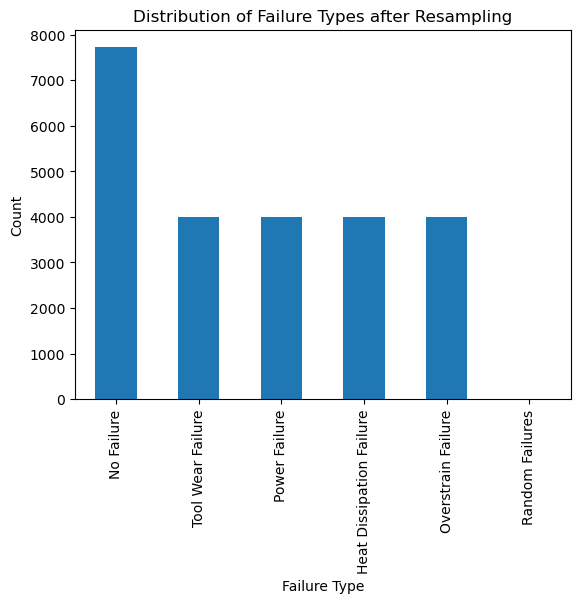

In [54]:
import matplotlib.pyplot as plt
df_resampled['Failure Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Failure Types after Resampling')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

In [57]:
df_resampled

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,300.400000,311.800000,1362,47.600000,188,No Failure
1,2,299.700000,309.300000,1399,41.900000,221,Tool Wear Failure
2,2,301.800000,309.600000,1436,49.000000,214,No Failure
3,1,300.400000,309.900000,1567,36.500000,72,No Failure
4,2,298.100000,307.900000,1377,55.100000,42,No Failure
...,...,...,...,...,...,...,...
23731,1,300.300000,310.997042,1381,47.431361,217,Tool Wear Failure
23732,2,301.815556,310.594980,1738,29.144035,219,Tool Wear Failure
23733,1,300.856391,310.371147,1655,30.072133,234,Tool Wear Failure
23734,0,299.901972,309.565104,1404,43.938469,212,Tool Wear Failure


# SMOTE-NC

In [72]:
X = df.drop('Failure Type', axis=1)
# X = X.drop('Target', axis=1)  
# X = X.drop('Tool wear [min]', axis=1)
y = df['Failure Type']

In [73]:
categorical_cols = ['Type']
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

In [74]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42)

In [76]:
print("Before SMOTE-NC:", Counter(y_train))

Before SMOTE-NC: Counter({1: 7722, 0: 90, 3: 76, 2: 62, 5: 36, 4: 14})


In [77]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [78]:
print("After SMOTE-NC:", Counter(y_resampled))

After SMOTE-NC: Counter({1: 7722, 5: 7722, 4: 7722, 3: 7722, 0: 7722, 2: 7722})


In [79]:
y_labels = le.inverse_transform(y_resampled)

In [80]:
y_resampled[:20], y_labels[:20]

(array([1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array(['No Failure', 'Tool Wear Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure',
        'No Failure', 'No Failure', 'No Failure', 'No Failure'],
       dtype=object))

In [81]:
import numpy as np

unique_labels, counts = np.unique(y_labels, return_counts=True)
print(dict(zip(unique_labels, counts)))

{'Heat Dissipation Failure': 7722, 'No Failure': 7722, 'Overstrain Failure': 7722, 'Power Failure': 7722, 'Random Failures': 7722, 'Tool Wear Failure': 7722}


In [82]:
import numpy as np


unique_labels, counts = np.unique(X_resampled['Type'], return_counts=True)
print(dict(zip(unique_labels, counts)))

{0: 1657, 1: 38002, 2: 6673}


In [83]:
X_resampled.head(20)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,300.4,311.8,1362,47.6,188
1,2,299.7,309.3,1399,41.9,221
2,2,301.8,309.6,1436,49.0,214
3,1,300.4,309.9,1567,36.5,72
4,2,298.1,307.9,1377,55.1,42
5,1,299.1,308.5,1539,46.8,190
6,0,299.8,309.2,1435,42.6,111
7,2,303.8,312.4,1597,33.4,203
8,1,302.7,312.2,1376,52.8,164
9,1,301.5,310.5,1466,48.1,189


In [85]:
import pandas as pd

df_resampled = X_resampled.copy()
df_resampled['Failure Type'] = y_resampled  
df_resampled['y_labels'] = y_labels  
df_resampled.to_csv('smote_nc_data.csv', index=False)


In [86]:
df_resampled

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,y_labels
0,2,300.400000,311.800000,1362,47.600000,188,1,No Failure
1,2,299.700000,309.300000,1399,41.900000,221,5,Tool Wear Failure
2,2,301.800000,309.600000,1436,49.000000,214,1,No Failure
3,1,300.400000,309.900000,1567,36.500000,72,1,No Failure
4,2,298.100000,307.900000,1377,55.100000,42,1,No Failure
...,...,...,...,...,...,...,...,...
46327,1,298.625943,308.870085,1555,36.904604,208,5,Tool Wear Failure
46328,1,299.010913,310.416369,1905,23.596428,222,5,Tool Wear Failure
46329,1,297.163461,307.989151,1550,35.941863,207,5,Tool Wear Failure
46330,1,301.917438,310.081672,1443,46.694571,235,5,Tool Wear Failure


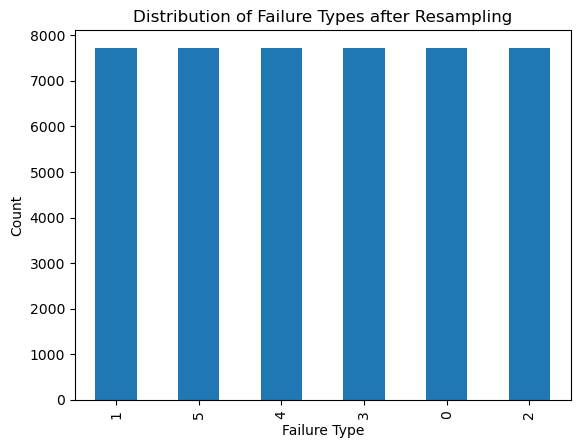

In [87]:
# Visualizing the distribution of the target variable after resampling
import matplotlib.pyplot as plt
df_resampled['Failure Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Failure Types after Resampling')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

In [88]:
df_resampled.to_csv('2_SMOTE_NC_data.csv', index=False)

# Modelling

In [89]:
df1 = pd.read_csv('2_SMOTE_boderline_data.csv')
df2 = pd.read_csv('2_SMOTE_NC_data.csv')

In [90]:
df1.head(),df2.head()

(   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
 0     2                300.4                    311.8                    1362   
 1     2                299.7                    309.3                    1399   
 2     2                301.8                    309.6                    1436   
 3     1                300.4                    309.9                    1567   
 4     2                298.1                    307.9                    1377   
 
    Torque [Nm]  Tool wear [min]       Failure Type  
 0         47.6              188         No Failure  
 1         41.9              221  Tool Wear Failure  
 2         49.0              214         No Failure  
 3         36.5               72         No Failure  
 4         55.1               42         No Failure  ,
    Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
 0     2                300.4                    311.8                    1362   
 1     2         

## SMOTE Boderline

### ML

In [171]:
# label encode df1['Failure Type'] 
df1['Failure Type'] = le.fit_transform(df1['Failure Type'])
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,300.4,311.8,1362,47.6,188,1
1,2,299.7,309.3,1399,41.9,221,5
2,2,301.8,309.6,1436,49.0,214,1
3,1,300.4,309.9,1567,36.5,72,1
4,2,298.1,307.9,1377,55.1,42,1


In [172]:
from sklearn.model_selection import train_test_split

x = df1.drop('Failure Type', axis=1)
x = df1.drop('Tool wear [min]', axis=1)
y = df1['Failure Type']

In [173]:
y.value_counts()

Failure Type
1    7722
5    4000
3    4000
0    4000
2    4000
4      14
Name: count, dtype: int64

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [175]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18988, 6), (4748, 6), (18988,), (4748,))

In [176]:
# normalize numerical data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape, x_test_scaled.shape

((18988, 6), (4748, 6))

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

y_pred = rf.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='weighted')*100)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 100.0
Precision: 100.0
[[ 786    0    0    0    0    0]
 [   0 1555    0    0    0    0]
 [   0    0  772    0    0    0]
 [   0    0    0  818    0    0]
 [   0    0    0    0    1    0]
 [   0    0    0    0    0  816]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       1.00      1.00      1.00      1555
           2       1.00      1.00      1.00       772
           3       1.00      1.00      1.00       818
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00       816

    accuracy                           1.00      4748
   macro avg       1.00      1.00      1.00      4748
weighted avg       1.00      1.00      1.00      4748



In [178]:
# cross-validation
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train_scaled, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores)*100)


Cross-validation scores: [1.         0.99947341 0.99947341 1.         0.99973663]
Mean cross-validation score: 99.97366896595148


In [179]:
import joblib

joblib.dump(rf, 'models2/smote-boderline/random_forest_99.joblib')

['models2/smote-boderline/random_forest_99.joblib']

In [108]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_scaled, y_train)

y_pred_svm = svm.predict(x_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("SVM Precision:", precision_score(y_test, y_pred_svm, average='weighted')*100)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 99.97893850042124
SVM Precision: 99.9579027799117
[[ 786    0    0    0    0    0]
 [   0 1555    0    0    0    0]
 [   0    0  772    0    0    0]
 [   0    0    0  818    0    0]
 [   0    0    0    0    0    1]
 [   0    0    0    0    0  816]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       1.00      1.00      1.00      1555
           2       1.00      1.00      1.00       772
           3       1.00      1.00      1.00       818
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00       816

    accuracy                           1.00      4748
   macro avg       0.83      0.83      0.83      4748
weighted avg       1.00      1.00      1.00      4748



c:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Integrated\anaconda3\Lib\site-packages\sklea

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted')*100)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 99.95787700084247
KNN Precision: 99.93685481600106
[[ 786    0    0    0    0    0]
 [   0 1555    0    0    0    0]
 [   0    0  772    0    0    0]
 [   0    1    0  817    0    0]
 [   0    0    0    0    0    1]
 [   0    0    0    0    0  816]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       1.00      1.00      1.00      1555
           2       1.00      1.00      1.00       772
           3       1.00      1.00      1.00       818
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00       816

    accuracy                           1.00      4748
   macro avg       0.83      0.83      0.83      4748
weighted avg       1.00      1.00      1.00      4748



c:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Integrated\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Integrated\anaconda3\Lib\site-packages\sklea

In [110]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)

y_pred_gnb = gnb.predict(x_test_scaled)

print("GNB Accuracy:", accuracy_score(y_test, y_pred_gnb)*100)
print("GNB Precision:", precision_score(y_test, y_pred_gnb, average='weighted')*100)

GNB Accuracy: 100.0
GNB Precision: 100.0


### DL

In [73]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [116]:
df1 = pd.read_csv('2_SMOTE_boderline_data.csv')

In [117]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,300.400000,311.800000,1362,47.600000,188,No Failure
1,2,299.700000,309.300000,1399,41.900000,221,Tool Wear Failure
2,2,301.800000,309.600000,1436,49.000000,214,No Failure
3,1,300.400000,309.900000,1567,36.500000,72,No Failure
4,2,298.100000,307.900000,1377,55.100000,42,No Failure
...,...,...,...,...,...,...,...
23731,1,300.300000,310.997042,1381,47.431361,217,Tool Wear Failure
23732,2,301.815556,310.594980,1738,29.144035,219,Tool Wear Failure
23733,1,300.856391,310.371147,1655,30.072133,234,Tool Wear Failure
23734,0,299.901972,309.565104,1404,43.938469,212,Tool Wear Failure


In [118]:
x = df1.drop(columns=['Failure Type', 'Tool wear [min]'],axis=1)
y = df1['Failure Type']

In [119]:
x.shape, y.shape

((23736, 5), (23736,))

In [120]:
y.value_counts()

Failure Type
No Failure                  7722
Tool Wear Failure           4000
Power Failure               4000
Heat Dissipation Failure    4000
Overstrain Failure          4000
Random Failures               14
Name: count, dtype: int64

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [122]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18988, 5), (4748, 5), (18988,), (4748,))

In [123]:
x_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
20738,2,300.046270,310.685081,1384,45.362702
16298,0,297.435180,308.075831,1383,62.926385
4153,1,302.500000,312.000000,1411,44.200000
2943,1,301.900000,310.400000,1376,54.900000
21308,1,301.752744,310.973628,1441,44.120671
...,...,...,...,...,...
21575,0,298.589409,308.001400,1607,35.850639
5390,1,297.200000,308.600000,1774,23.000000
860,2,298.500000,309.600000,1364,58.700000
15795,1,298.848736,310.067219,1370,53.663862


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((18988, 5), (4748, 5))

In [125]:
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


def build_baseline_nn(input_dim, num_classes):
    model = models.Sequential([
    layers.Dense(128, activation='relu', input_dim=input_dim),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

num_classes = len(np.unique(y_train))
model = build_baseline_nn(x_train.shape[1], num_classes)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="models2/dl_base.keras",   
    monitor="val_loss",         
    save_best_only=True,        
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss", 
    patience=5,                 
    restore_best_weights=True,  
    verbose=1
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/50
295/297 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4881 - loss: 1.3910
Epoch 1: val_loss improved from inf to 1.24387, saving model to models2/dl_base.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4893 - loss: 1.3876 - val_accuracy: 0.5703 - val_loss: 1.2439
Epoch 2/50
291/297 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 0.6936
Epoch 2: val_loss improved from 1.24387 to 0.60894, saving model to models2/dl_base.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7295 - loss: 0.6929 - val_accuracy: 0.7388 - val_loss: 0.6089
Epoch 3/50
284/297 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7673 - loss: 0.5803
Epoch 3: val_loss improved from 0.60894 to 0.40904, saving model to models2/dl_base.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7675 - loss: 0.5799 - val_accuracy: 0.8366 - val_loss: 0.4090
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7733 - loss: 0.5521
Epoch 4: val_loss improved from 0.40904

In [129]:
model.save('models2/smote-boderline/dl_baseline.h5')

In [130]:
from tensorflow.keras.models import load_model

m1 = load_model('models2/smote-boderline/dl_baseline.h5')
m1.evaluate(x_test, y_test, verbose=0)

[0.2753077447414398, 0.8879528045654297]

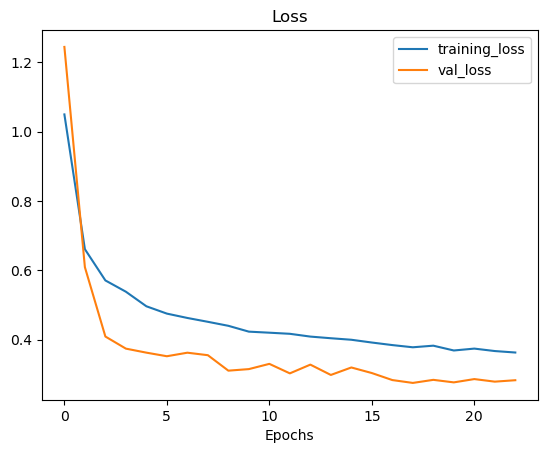

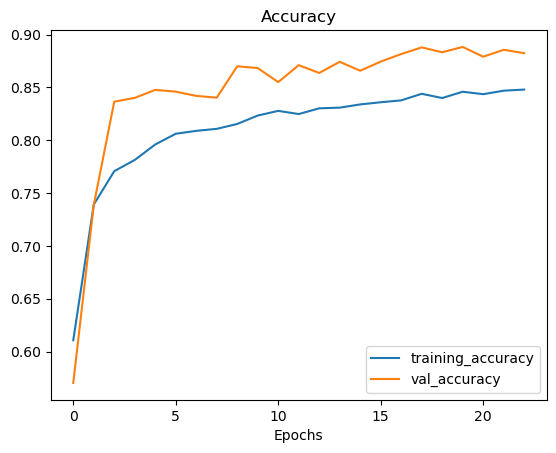

In [131]:
from helper_functions import *

plot_loss_curves(history)

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Inputs
inputs = keras.Input(shape=(x_train.shape[1],))

# Project numerical + categorical features
x = layers.Dense(64, activation="relu")(inputs)

# Transformer block
attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x[:, None, :], x[:, None, :])
x = layers.Add()([x[:, None, :], attn_output])
x = layers.LayerNormalization()(x)

# Flatten and dense
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(np.unique(y_train)), activation="softmax")(x)

# Model
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="models2/dl_transformer.keras",   
    monitor="val_loss",         
    save_best_only=True,        
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss", 
    patience=5,                 
    restore_best_weights=True,  
    verbose=1
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3378 - loss: 1.6529
Epoch 1: val_loss improved from inf to 0.95721, saving model to models2/dl_transformer.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3381 - loss: 1.6520 - val_accuracy: 0.6363 - val_loss: 0.9572
Epoch 2/100
294/297 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6208 - loss: 0.9282
Epoch 2: val_loss improved from 0.95721 to 0.68157, saving model to models2/dl_transformer.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6212 - loss: 0.9273 - val_accuracy: 0.7294 - val_loss: 0.6816
Epoch 3/100
289/297 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7062 - loss: 0.7012
Epoch 3: val_loss improved from 0.68157 to 0.56894, saving model to models2/dl_transformer.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7064 - loss: 0.7005 - val_accuracy: 0.7580 - val_loss: 0.5689
Epoch 4/100
293/297 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7358 - loss: 0.6116
Epoch 4: val_

In [147]:
model.evaluate(x_test, y_test, verbose=0)

[0.19472843408584595, 0.929654598236084]

In [146]:
m2 = load_model('models2/smote-boderline/dl_2_transformer.keras')
m2.evaluate(x_test, y_test, verbose=0)

[0.19472843408584595, 0.929654598236084]

In [145]:
model.save('models2/smote-boderline/dl_2_transformer.keras')

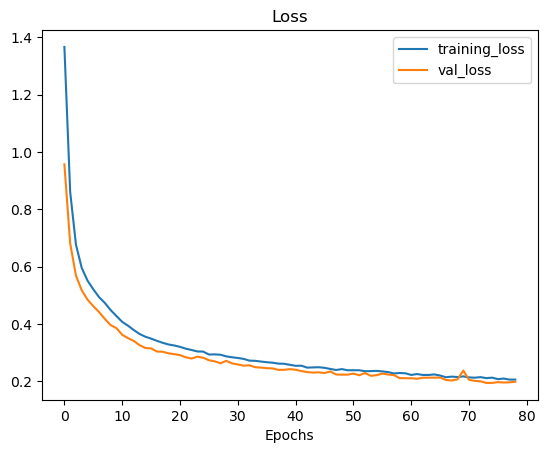

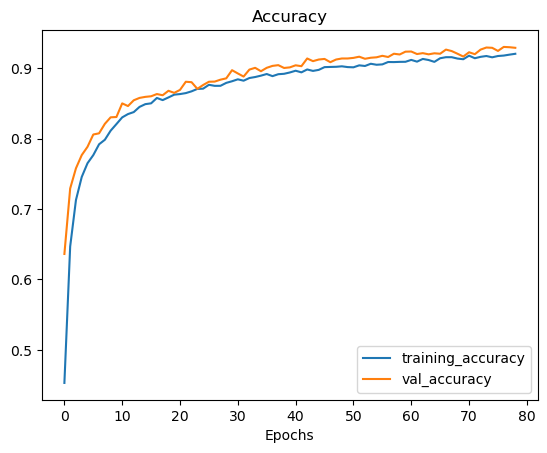

In [143]:
plot_loss_curves(history)

## SMOTE-NC

### ML

In [112]:
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,y_labels
0,2,300.4,311.8,1362,47.6,188,1,No Failure
1,2,299.7,309.3,1399,41.9,221,5,Tool Wear Failure
2,2,301.8,309.6,1436,49.0,214,1,No Failure
3,1,300.4,309.9,1567,36.5,72,1,No Failure
4,2,298.1,307.9,1377,55.1,42,1,No Failure


In [113]:
df2.drop('y_labels', axis=1, inplace=True)

In [114]:
df2['Failure Type'].value_counts()

Failure Type
1    7722
5    7722
4    7722
3    7722
0    7722
2    7722
Name: count, dtype: int64

In [144]:
x = df2.drop('Failure Type', axis=1)
x = x.drop('Tool wear [min]', axis=1)
y = df2['Failure Type']

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [146]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37065, 5), (9267, 5), (37065,), (9267,))

In [147]:
# normalize numerical data except 'Type' column
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Identify columns to scale (exclude 'type')
cols_to_scale = [col for col in x_train.columns if col != 'Type']

# Initialize scaler
scaler = MinMaxScaler()

# Fit scaler only on the selected columns
scaler.fit(x_train[cols_to_scale])

# Transform only selected columns
x_train_scaled = x_train.copy()
x_train_scaled[cols_to_scale] = scaler.transform(x_train[cols_to_scale])

x_test_scaled = x_test.copy()
x_test_scaled[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

x_train_scaled.shape, x_test_scaled.shape



((37065, 5), (9267, 5))

In [158]:
# save normalized x_train_scaled and y_train to csv
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled_df['Failure Type'] = y_train.values


In [151]:
y_train.head()

41383    5
39476    5
39890    5
29115    3
19470    2
Name: Failure Type, dtype: int64

In [149]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

y_pred = rf.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, average='weighted')*100)

Accuracy: 97.97129599654689
Precision: 98.00836582158186


In [132]:
# Cross-Validation RFC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score with accuracy
scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')

print("Cross-validated accuracies for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validated accuracies for each fold: [0.97895759 0.98089997 0.98025038 0.98284049 0.9803583 ]
Mean Accuracy: 0.9806613456171146


In [170]:
import joblib

joblib.dump(rf, 'models2/smote-nc/random_forest_98.joblib')

['models2/smote-nc/random_forest_98.joblib']

In [133]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train_scaled, y_train)

y_pred_svm = svm.predict(x_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("SVM Precision:", precision_score(y_test, y_pred_svm, average='weighted')*100)

SVM Accuracy: 71.5657710154311
SVM Precision: 70.91688676210863


In [134]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='weighted')*100)

KNN Accuracy: 94.44264594798749
KNN Precision: 94.82577280748775


In [135]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)

y_pred_gnb = gnb.predict(x_test_scaled)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb)*100)
print("GaussianNB Precision:", precision_score(y_test, y_pred_gnb, average='weighted')*100)

GaussianNB Accuracy: 56.63105643681882
GaussianNB Precision: 63.31538437654994


In [ ]:
# import numpy as np
# import pandas as pd

# def predict_failure(user_input_dict, model, scaler):
#     """
#     Predict failure type based on user input.

#     Parameters:
#     - user_input_dict: dict of input values (e.g., from a form or CLI)
#     - model: trained model object
#     - scaler: fitted StandardScaler object

#     Returns:
#     - Encoded predicted class (int)
#     """
#     # Define column order and mapping
#     columns = ['Type', 'Air temperature [K]', 'Process temperature [K]',
#                'Rotational speed [rpm]', 'Torque [Nm]']
#     type_map = {'L': 0, 'M': 1, 'H': 2}

#     # Convert input to DataFrame
#     input_df = pd.DataFrame([user_input_dict], columns=columns)

#     # Map 'Type' to numeric and fill NaN if unmapped
#     input_df['Type'] = input_df['Type'].map(type_map)

#     if input_df['Type'].isnull().any():
#         raise ValueError(f"Invalid 'Type' value provided: {user_input_dict['Type']} (must be one of {list(type_map.keys())})")

#     # Normalize numerical columns
#     numeric_cols = ['Air temperature [K]', 'Process temperature [K]',
#                     'Rotational speed [rpm]', 'Torque [Nm]']
#     input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

#     # Final check for NaNs
#     if input_df.isnull().any().any():
#         raise ValueError("Processed input contains NaNs. Please check input values.")

#     # Predict using the model
#     pred = model.predict(input_df)
#     return pred[0]




In [ ]:
# x_train_scaled_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Failure Type
41383,1,0.310587,0.432825,0.216657,0.454041,5
39476,1,0.603409,0.583528,0.276645,0.363918,5
39890,1,0.594638,0.754735,0.207338,0.479389,5
29115,2,0.892829,0.856314,0.893419,0.084189,3
19470,1,0.362751,0.392914,0.067560,0.788211,2
...,...,...,...,...,...,...
3996,1,0.483516,0.687500,0.107164,0.663446,1
15835,1,0.387706,0.538672,0.161910,0.620604,2
10201,1,0.890110,0.762500,0.100757,0.595139,0
35976,1,0.450627,0.381044,0.272568,0.367117,4


In [ ]:


# user_input = {
#     'Type': '1',
#     'Air temperature [K]': 298.9,
#     'Process temperature [K]': 309.1,
#     'Rotational speed [rpm]': 2861,
#     'Torque [Nm]': 4.6
# }


# # Direct prediction using the trained model and scaler
# pred = rf.predict(pd.DataFrame([user_input]))
# # pred2 = rf2.predict(pd.DataFrame([user_input]))
# # predicted_failure_type = le.inverse_transform(pred)[0]
# print("Predicted Failure Type:", pred)
# # print("Predicted Failure Type (SMOTE-NC):", pred2)

# # prediction = predict_failure(user_input, rf, scaler)
# # print("Predicted Failure Type:", prediction)


Predicted Failure Type: [3]


### DL

In [154]:
df2 = pd.read_csv('2_SMOTE_NC_data.csv')

In [155]:
df2

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,y_labels
0,2,300.400000,311.800000,1362,47.600000,188,1,No Failure
1,2,299.700000,309.300000,1399,41.900000,221,5,Tool Wear Failure
2,2,301.800000,309.600000,1436,49.000000,214,1,No Failure
3,1,300.400000,309.900000,1567,36.500000,72,1,No Failure
4,2,298.100000,307.900000,1377,55.100000,42,1,No Failure
...,...,...,...,...,...,...,...,...
46327,1,298.625943,308.870085,1555,36.904604,208,5,Tool Wear Failure
46328,1,299.010913,310.416369,1905,23.596428,222,5,Tool Wear Failure
46329,1,297.163461,307.989151,1550,35.941863,207,5,Tool Wear Failure
46330,1,301.917438,310.081672,1443,46.694571,235,5,Tool Wear Failure


In [156]:
x = df2.drop(columns=['Failure Type', 'Tool wear [min]', 'y_labels'], axis=1)
y = df2['Failure Type']

In [157]:
x.shape, y.shape

((46332, 5), (46332,))

In [158]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((37065, 5), (9267, 5))

In [160]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


def build_baseline_nn(input_dim, num_classes):
    model = models.Sequential([
    # layers.Dense(128, activation='relu', input_dim=input_dim),
    # layers.BatchNormalization(),
    # layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Example usage:
# Assume X_train, X_test, y_train, y_test are already preprocessed
num_classes = len(np.unique(y_train))
model = build_baseline_nn(x_train.shape[1], num_classes)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="models2/dl2_base.keras",   
    monitor="val_loss",         
    save_best_only=True,        
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss", 
    patience=5,                 
    restore_best_weights=True,  
    verbose=1
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/50
568/580 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4919 - loss: 1.3181
Epoch 1: val_loss improved from inf to 0.80965, saving model to models2/dl2_base.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4942 - loss: 1.3114 - val_accuracy: 0.6792 - val_loss: 0.8096
Epoch 2/50
579/580 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 0.7470
Epoch 2: val_loss improved from 0.80965 to 0.56254, saving model to models2/dl2_base.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6936 - loss: 0.7469 - val_accuracy: 0.7733 - val_loss: 0.5625
Epoch 3/50
569/580 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 0.6811
Epoch 3: val_loss improved from 0.56254 to 0.55247, saving model to models2/dl2_base.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7143 - loss: 0.6808 - val_accuracy: 0.7571 - val_loss: 0.5525
Epoch 4/50
578/580 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7335 - loss: 0.6417
Epoch 4: val_loss improved from 0.55

In [162]:
model.save('models2/smote-nc/dl2_baseline.keras')

In [163]:
m3 = load_model('models2/smote-nc/dl2_baseline.keras')
m3.evaluate(x_test, y_test, verbose=0)

[0.2873947322368622, 0.8929535150527954]

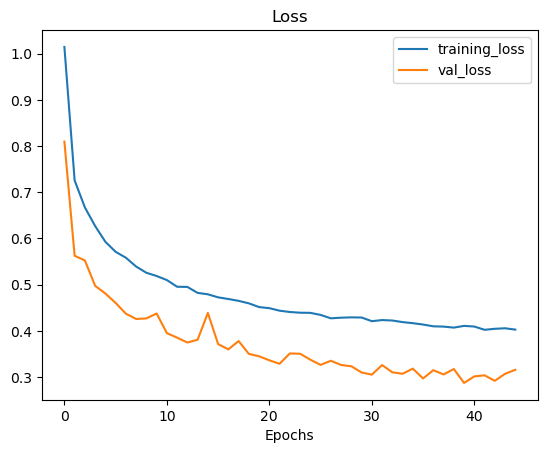

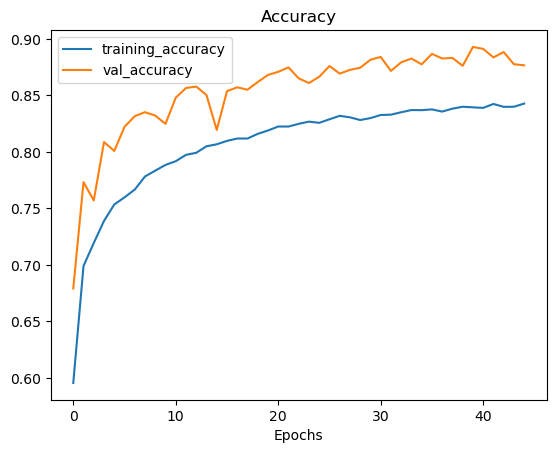

In [161]:
plot_loss_curves(history)

In [165]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Inputs
inputs = keras.Input(shape=(x_train.shape[1],))

# Project numerical + categorical features
x = layers.Dense(64, activation="relu")(inputs)

# Transformer block
attn_output = layers.MultiHeadAttention(num_heads=8, key_dim=32)(x[:, None, :], x[:, None, :])
x = layers.Add()([x[:, None, :], attn_output])
x = layers.LayerNormalization()(x)

# Flatten and dense
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(np.unique(y_train)), activation="softmax")(x)

# Model
model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="models2/dl_base.keras",   
    monitor="val_loss",         
    save_best_only=True,        
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss", 
    patience=5,                 
    restore_best_weights=True,  
    verbose=1
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/100


c:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


576/580 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4199 - loss: 1.4489
Epoch 1: val_loss improved from inf to 0.75920, saving model to models2/dl_base.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4210 - loss: 1.4463 - val_accuracy: 0.7050 - val_loss: 0.7592
Epoch 2/100
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6827 - loss: 0.7630
Epoch 2: val_loss improved from 0.75920 to 0.64517, saving model to models2/dl_base.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6827 - loss: 0.7629 - val_accuracy: 0.7394 - val_loss: 0.6452
Epoch 3/100
576/580 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7174 - loss: 0.6651
Epoch 3: val_loss improved from 0.64517 to 0.59694, saving model to models2/dl_base.keras
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7175 - loss: 0.6650 - val_accuracy: 0.7569 - val_loss: 0.5969
Epoch 4/100
575/580 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7537 - loss: 0.6028
Epoch 4: val_loss improved from 0.5969

In [168]:
model.save('models2/smote-nc/dl2_transformer.keras')

In [169]:
m4 = load_model('models2/smote-nc/dl2_transformer.keras')
m4.evaluate(x_test, y_test, verbose=0)

c:\Users\Integrated\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[0.20980645716190338, 0.9302902817726135]

In [167]:
model.evaluate(x_test, y_test, verbose=0)

[0.20980645716190338, 0.9302902817726135]

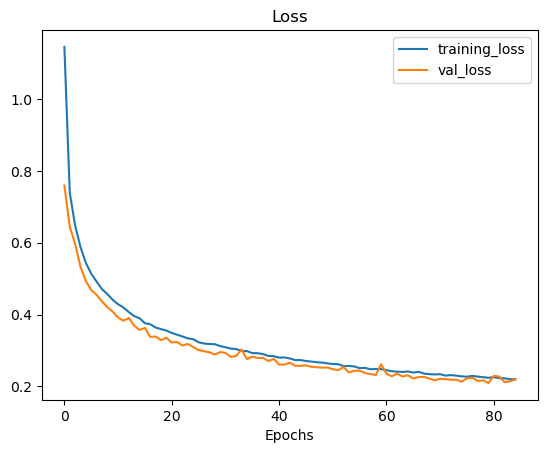

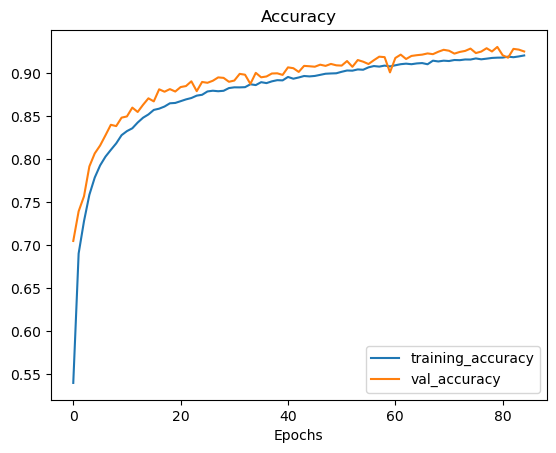

In [166]:
plot_loss_curves(history)